##DATA WRANGLING

**Tổng quan**

*Robert* là một thanh niên người Mỹ năm nay 25 tuổi, anh vừa kết thúc nghĩa vụ quân sự. Robert giờ muốn theo học ngành Hệ thống quản lý và Công nghệ thông tin (Management Systems and Information Technology).

Hãy dùng kĩ năng data của bạn để giúp tìm ngôi trường tốt nhất cho Robert. Robert sẵn sàng chuyển tới bất kỳ đâu trên nước Mỹ để sinh sống, tuy nhiên anh ý có một vài tiêu chí chọn trường như sau: 
1. An toàn (tỷ lệ tội phạm thấp)

2. Ở đô thị -- vì Robert thích cuộc sống ở thành phố

3. Start-ups – ngôi trường phải ở trong một khu vực mà xếp hạng cao về tinh thần doanh nhân (entrepreneurialism), vì anh ý có kế hoạch sẽ tìm kiếm 1 công việc thực tập tại 1 startup trong khi theo học.

Hãy giúp Robert rút gọn danh sách tìm kiếm xuống thành một danh sách những trường tiềm năng để anh ý có thể tiếp tục nghiên cứu kĩ hơn trước khi đưa ra lựa chọn.


**Các tiêu chí chọn trường:**

* Phải ở khu vực thành thị (urban/metropolitan area).

* Phải ở 1 thành phố mà xếp hạng 75th percentile hoặc cao hơn trong Dữ liệu “metro_startup_ranking” (tức là trong top 25% có rank cao nhất, với rank 1 là cao nhất).

* Phải ở 1 thành phố mà có thấp hơn 50th percentile vể tổng số vụ phạm tội (total number of crime).

* Có chương trình học về lĩnh vực **“Computer And Information Sciences And Support Services”**.

*Gợi ý:*

- Đọc data dictionary để hiểu ý nghĩa các bảng, cột (chỉ tập trung đọc những phần mình quan tâm ở dictionary thôi).
- Xóa các cột không cần thiết.
- Tìm các cột phù hợp để join các bảng với nhau.
Thực hiện data cleaning và chuẩn hóa data nếu cần để có thể join các bảng với nhau.
- Tạo 1 bảng summary variable thể hiện số lượng các vụ phạm tội ở khu vực của các trường, từ đó ta có thể so sánh các trường theo tổng số vụ phạm tội.
- Tạo ra 1 phương pháp để xếp hạng các trường theo đánh giá tất cả các tiêu chí của Robert.

**Nhiệm vụ**

* Xuất ra 1 danh sách những trường mà thỏa mãn tất cả các tiêu chí của Robert
* Xếp hạng các trường từ cao xuống thấp theo các tiêu chí đó.
* Sử dụng Python để import và xử lý dữ liệu. Sử dụng Jupyter notebook và markdown trong jupyter notebook để trình bày bài làm. Dùng Markdown là cách viết tài liệu nhanh gọn và rõ ràng để chia sẻ các phân tích giữa các thành viên trong các team analytics. 


# **Add libraries and get an overview**

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
print('Completed')

Completed


In [ ]:
# Read in the dataset
crime = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRFJLwlI40yMZ0WNyxSsboETBz73GSqsushsbK8QWRqd1oEXV-vNDssyJEDjDcYjwcF2CPuTrL2_Ayp/pub?gid=905535370&single=true&output=csv')
duni = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTsgoLnQtKA4SNCTMB0f47rqRi-3ry6aB-Ho3eRAGeo653WACj_iPgfKZcirXeHcaRcGrFlKnmGy11S/pub?gid=638174061&single=true&output=csv')
metro = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSvJI4Qkp0jSxvZYGtvbK6BEaGXrO4YG0aLtbVK0zDbkvB0l5dgcbWuQ7Zwq2S2ESuieU90wtM1ZRCl/pub?gid=954232962&single=true&output=csv')
unifo = pd.read_csv('University_info.csv') #File too large to open with sheet Upload to storage to read.
print('Completed')

In [ ]:
crime.head()

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque


In [ ]:
duni.head()

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,NaN,root,id,UNITID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,NaN,root,ope8_id,OPEID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,NaN,root,ope6_id,opeid6,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
3,Institution name,2013,school,name,INSTNM,string,NaN,NaN,NaN,Y,IPEDS,NaN
4,City,2013,school,city,CITY,string,NaN,NaN,NaN,Y,IPEDS,NaN


In [ ]:
metro.head()

,Metro Area Code,Metro Area Name,Metro Area Main City,Metro Area States,Startup Rank
0,12060,Atlanta-Sandy Springs-Marietta,Atlanta,Georgia,13
1,12420,Austin-Round Rock-San Marcos,Austin,Texas,1
2,12580,Baltimore-Towson,Baltimore,Maryland,17
3,14460,Boston-Cambridge-Quincy,Boston,Massachusetts-New Hampshire,22
4,16740,Charlotte-Gastonia-Rock Hill,Charlotte,North Carolina-South Carolina,25


In [ ]:
unifo.head(10)

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,Southern Association of Colleges and Schools C...,www.ua.edu/,oira.ua.edu,...,0.763829082478,0.876039304611,0.816259087905,0.816176470588,0.786885245902,0.838674335798,NaN,0.66600935383909,NaN,0.69062709956709
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,35010,Southern Association of Colleges and Schools C...,www.cacc.edu,www.cacc.edu/graphics/netpricecalculator/npcal...,...,0.370833333333,0.712574850299,0.425,0.46887966805,0.45995423341,0.437735849057,0.1187,NaN,0.28918936170212,NaN
7,100812,100800,1008,Athens State University,Athens,AL,35611,Southern Association of Colleges and Schools C...,www.athens.edu,24.athens.edu/apex/prod8/f?p=174:1:39413574495...,...,0.736203090508,0.822878228782,0.751684311838,0.810344827586,0.780089153046,0.762658227848,NaN,NaN,NaN,NaN
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,Southern Association of Colleges and Schools C...,www.aum.edu,www.aum.edu/admissions/financial-information/p...,...,0.56916426513,0.747826086957,0.634807417974,0.613149847095,0.637096774194,0.667286245353,NaN,0.28530922787193,NaN,0.31741839080459
9,100858,100900,1009,Auburn University,Auburn University,AL,36849,Southern Association of Colleges and Schools C...,www.auburn.edu,www.auburn.edu/admissions/money-matters.html,...,0.828978622328,0.929063640049,0.897800183318,0.86908315565,0.843118383061,0.904134212103,NaN,0.68093024159281,NaN,0.69602211910286


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSA                378 non-null    object 
 1   ViolentCrime       377 non-null    object 
 2   Murder             378 non-null    float64
 3   Rape               378 non-null    float64
 4   Robbery            378 non-null    float64
 5   AggravatedAssault  377 non-null    float64
 6   PropertyCrime      372 non-null    object 
 7   Burglary           374 non-null    object 
 8   Theft              375 non-null    object 
 9   MotorVehicleTheft  378 non-null    float64
 10  State              378 non-null    object 
 11  City               373 non-null    object 
dtypes: float64(5), object(7)
memory usage: 35.6+ KB


In [ ]:
duni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NAME OF DATA ELEMENT     1720 non-null   object 
 1   Year                     253 non-null    object 
 2   dev-category             1848 non-null   object 
 3   developer-friendly name  1117 non-null   object 
 4   VARIABLE NAME            1720 non-null   object 
 5   API data type            1720 non-null   object 
 6   label                    38 non-null     object 
 7   VALUE                    259 non-null    float64
 8   LABEL                    297 non-null    object 
 9   SCORECARD? Y/N           63 non-null     object 
 10  SOURCE                   1720 non-null   object 
 11  NOTES                    44 non-null     object 
dtypes: float64(1), object(11)
memory usage: 183.2+ KB


In [ ]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Metro Area Code       40 non-null     int64 
 1   Metro Area Name       40 non-null     object
 2   Metro Area Main City  40 non-null     object
 3   Metro Area States     40 non-null     object
 4   Startup Rank          40 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ KB


In [ ]:
unifo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 1729 entries, UNITID to C200_4_POOLED_SUPP
dtypes: float64(1539), int64(12), object(178)
memory usage: 102.9+ MB


#DATA DICTIONARY


---
       Link from google: https://drive.google.com/drive/folders/1VKBXbHKafN1uXR9SAJkQQ97QZN4RK8ae

---
A. Table crime: Bảng thống kê tình hình an ninh & tội phạm.

B. Table Dictionary for University_info: Giải nghĩa bảng  University_info.

C. Table metro_startup_ranking: Bảng xếp hạng Startup.

D. Table University_info: Thông tin trường đại học.




A. Table crime: 
   - Columns: 
      1. MSA: Metropolitan Statistical Areas Name
      2. ViolentCrime
      3. Murder
      4. Rape
      5. Robbery
      6. AggravatedAssault
      7. PropertyCrime
      8. Burglary
      9. Theft
      10. MotorVehicleTheft
      11. State
      12. City
---



C. Table metro_startup_ranking: Bảng xếp hạng Startup.
   * Columns:
        1. Metro Area Code
        2. Metro Area Name
        3. Metro Area Main City
        4. Metro Area States
        5. Startup Rank

---



D. Table University_info:
   * Columns:
       1. INSTNM: Institution name
       2. CITY
       3. STABBR: State postcode
       4. PCIP11:
Percentage of degrees awarded in Computer And Information Sciences And Support Services.
       5. CIP11CERT1:
Certificate of less than one academic year in Computer And Information Sciences And Support Services.
       6. CIP11CERT2:
Certificate of at least one but less than two academic years in Computer And Information Sciences And Support Services.

    7. CIP11ASSOC:
Associate degree in Computer And Information Sciences And Support Services.

    8. CIP11CERT4:
Award of more than two but less than four academic years in Computer And Information Sciences And Support Services
    9. CIP11BACHL:
Bachelor's degree in Computer And Information Sciences And Support Services.
  10. LOCALE: Locale of institution
    
      ....

# **Data analysis and processing**

In [ ]:
# Make a copy of the data:
crime_1 = crime.copy()
duni_1 = duni.copy() 
metro_1 = metro.copy()
print('Completed')

Completed


In [ ]:
#Take necessary columns & change to same name:
unifo_1 = unifo[['INSTNM','CITY','STABBR','LOCALE','PCIP11','CIP11CERT1','CIP11CERT2','CIP11ASSOC','CIP11CERT4','CIP11BACHL']]
metro_1.rename(columns = {'Metro Area Main City':'CITY'}, inplace = True)
crime_1.rename(columns = {'City':'CITY'}, inplace = True)
unifo_1.rename(columns = {'STABBR':'State'}, inplace = True)
print('Completed')

Completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Yêu cầu 1: thành phố xếp hạng nằm trong top 25% có rank cao nhất( tính từ Top 1) trong dữ liệu "metro_startup_ranking"


In [ ]:
#Find top 25% Startup Ranking in 'metro_startup_ranking':
q25 = metro_1['Startup Rank'].quantile(q=0.25)            # Return values at the given quantile over requested axis q=0.25(25% quantile)
metro25 = metro_1[metro_1['Startup Rank'].le(q25)]    # Get Less than or equal to of dataframe and other, element-wise (binary operator `le`).
metro25 = metro25.sort_values(by='Startup Rank')    
metro25

,Metro Area Code,Metro Area Name,CITY,Metro Area States,Startup Rank
1,12420,Austin-Round Rock-San Marcos,Austin,Texas,1
18,33100,Miami-Fort Lauderdale-Pompano Beach,Miami,Florida,2
34,41940,San Jose-Sunnyvale-Santa Clara,SanJose,California,3
17,31100,Los Angeles-Long Beach-Santa Ana,LosAngeles,California,4
10,19740,Denver-Aurora-Broomfield,Denver,Colorado,5
33,41860,San Francisco-Oakland-Fremont,SanFrancisco,California,6
22,35620,New York-Northern New Jersey-Long Island,NewYork,New York-New Jersey-Pennsylvania,7
12,26420,Houston-Sugar Land-Baytown,Houston,Texas,8
32,41740,San Diego-Carlsbad-San Marcos,SanDiego,California,9
31,41700,San Antonio-New Braunfels,SanAntonio,Texas,10


## **Yêu cầu 2: ở thành phố mà có thấp hơn 50th percentile vể tổng số vụ phạm tội (total number of crime).**

In [ ]:
#Check data type:
crime_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSA                378 non-null    object 
 1   ViolentCrime       377 non-null    object 
 2   Murder             378 non-null    float64
 3   Rape               378 non-null    float64
 4   Robbery            378 non-null    float64
 5   AggravatedAssault  377 non-null    float64
 6   PropertyCrime      372 non-null    object 
 7   Burglary           374 non-null    object 
 8   Theft              375 non-null    object 
 9   MotorVehicleTheft  378 non-null    float64
 10  State              378 non-null    object 
 11  CITY               373 non-null    object 
dtypes: float64(5), object(7)
memory usage: 35.6+ KB


In [ ]:
# Change data type of crime_1's columns:
crime_1['ViolentCrime'] = crime_1['ViolentCrime'].str.replace(',','') #Replace "," to "" have a right form of float
crime_1['ViolentCrime'] = crime_1['ViolentCrime'].astype(float)
crime_1['PropertyCrime'] = crime_1['PropertyCrime'].str.replace(',','')
crime_1['PropertyCrime'] = crime_1['PropertyCrime'].astype(float)
crime_1['Burglary'] = crime_1['Burglary'].str.replace(',','')
crime_1['Burglary'] = crime_1['Burglary'].astype(float)
crime_1['Theft'] = crime_1['Theft'].str.replace(',','')
crime_1['Theft'] = crime_1['Theft'].astype(float)

In [ ]:
#Check data type again:
crime_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSA                378 non-null    object 
 1   ViolentCrime       377 non-null    float64
 2   Murder             378 non-null    float64
 3   Rape               378 non-null    float64
 4   Robbery            378 non-null    float64
 5   AggravatedAssault  377 non-null    float64
 6   PropertyCrime      372 non-null    float64
 7   Burglary           374 non-null    float64
 8   Theft              375 non-null    float64
 9   MotorVehicleTheft  378 non-null    float64
 10  State              378 non-null    object 
 11  CITY               373 non-null    object 
dtypes: float64(9), object(3)
memory usage: 35.6+ KB


In [ ]:
#Create new table: Totalcrime to contain total number of crime
crime_1['total number of crime'] = crime_1.sum(axis=1)                  #Calculate total number of crime
Totalcrime = crime_1[['MSA','State','CITY','total number of crime']]   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# The Cities that have less than 50th percentile of total crimes (total number of crime).
q50 = Totalcrime['total number of crime'].quantile(q=0.5)            # Return values at the given quantile over requested axis q=0.50(50% quantile)
Totalcrime50 = Totalcrime[Totalcrime['total number of crime'].le(q50)]    # Get Less than or equal to of dataframe and other, element-wise (binary operator `le`).
Totalcrime50.sort_values(by='total number of crime')

,MSA,State,CITY,total number of crime
126,"Glens Falls, NY M.S.A.4",NY,Glens Falls,536.1
376,"San German, Puerto Rico M.S.A.","San German, Puerto Rico M.S.A.",San German,1024.2
91,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,Denver,1112.8
371,"Aguadilla-Isabela, Puerto Rico M.S.A.","Aguadilla-Isabela, Puerto Rico M.S.A.",Aguadilla,1637.9
149,"Houston-The Woodlands-Sugar Land, TX M.S.A.3",TX,Houston,2097.2
...,...,...,...,...
169,"Killeen-Temple, TX M.S.A.",TX,Killeen,5798.9
96,"Dothan, AL M.S.A.",AL,Dothan,5807.3
219,"Midland, TX M.S.A.",TX,Midland,5826.1
266,"Pocatello, ID M.S.A.",ID,Pocatello,5859.6


##Yêu cầu 3: Thành phố thuộc khu vực Urban/Metropolitan area

Tham khảo từ bảng dictionary for University_info:

Column LOCALE: Locale of institution

In [ ]:
unifo_1['LOCALE'].unique()

array([12., 13., 32., 31., 41., 21., 43., 42., 11., 23., 33., 22., nan])

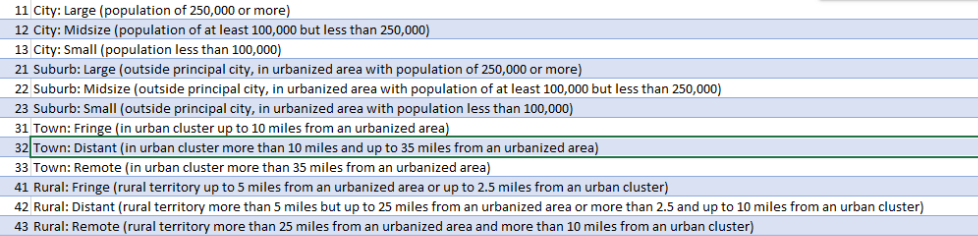

*Khu vực có LOCALE là 41,42,43 là không thõa yêu cầu.*

In [ ]:
#Check table shape
unifo_1.shape

(7804, 10)

In [ ]:
#Filter all rows for which the LOCALE not equal 41,42,43.
#metropolitan = ['11','12','13','21','22','23','31','32','33'] 
#df.loc[df['column'].isin(array)]  For "IN" use: something.isin(somewhere)
#rural = ['41.', '42.', '43.']
#unifo_1 = unifo_1.loc[~unifo_1['LOCALE'].isin(rural)]  For "NOT IN": ~something.isin(somewhere)

#Drop rural area:
unifo_1 = unifo_1[unifo_1['LOCALE'] < 40]                                                             

In [ ]:
#Check again
unifo_1['LOCALE'].unique()

array([12., 13., 32., 31., 21., 11., 23., 33., 22.])

## Yêu cầu 4: có chương trình học về lĩnh vực "*Computer And Infomation Sciences and Support Services*" :

From Dictionary for University_info we find some programs: *Computer And Infomation Sciences and Support Services*
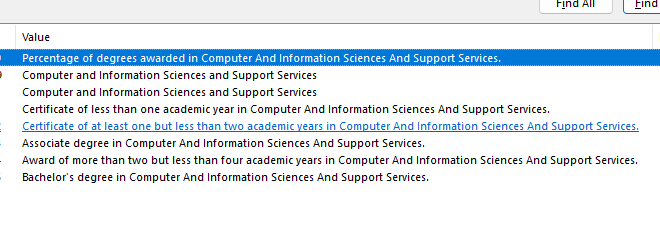

**Thông tin các chương trình học về lĩnh vực Computer And Information Sciences And Support Services** 

From University_info 
* Column PCIP11: 

Percentage of degrees awarded in Computer And Information Sciences And Support Services. PCIP11 != 0 thì nhận

* Column CIP11CERT1: 

Certificate of less than one academic year in Computer And Information Sciences And Support Services.

* Column CIP11CERT2: 

Certificate of at least one but less than two academic years in Computer And Information Sciences And Support Services.

* Column CIP11ASSOC: 

Associate degree in Computer And Information Sciences And Support Services.

* Column CIP11CERT4:

Award of more than two but less than four academic years in Computer And Information Sciences And Support Services

* Column CIP11BACHL:

Bachelor's degree in Computer And Information Sciences And Support Services.

In [ ]:
#Drop University that do not have a curriculum survey
unifo_1 = unifo_1.dropna(subset=['PCIP11', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL'], how='all')
print('Completed')

Completed


In [ ]:
#Drop University with value 0 in all column above:
unifo_1 = unifo_1.loc[~((unifo_1['PCIP11'] == 0) & (unifo_1['CIP11CERT1'] == 0) & (unifo_1['CIP11CERT2'] == 0) & (unifo_1['CIP11ASSOC'] == 0) & (unifo_1['CIP11CERT4'] == 0) & (unifo_1['CIP11BACHL'] == 0)),:]
#Try to filter with loc. The "~" means you want to keep those with the opposite of your condition. The ":" means you want to keep all the columns
print('Completed')

Completed


In [ ]:
#Drop unnecessary columns:
unifo_1 = unifo_1.drop(['PCIP11', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL'], axis=1)
print('Completed')

Completed


#Tạo bảng summary variable thể hiện số lượng các vụ phạm tội ở khu vực của các trường, từ đó ta có thể so sánh các trường theo tổng số vụ phạm tội
**Merge all condition to have a table we need.**

Tổng hợp bảng:
 + metro25: Top 25% Startup Ranking in 'metro_startup_ranking'
 + Totalcrime50: Top 50% lowest total number of crime 
 + unifo_1: Tổng hợp các trường ở khu vực đô thị và có chương trình về lĩnh vực Computer And Information Sciences And Support Services

In [ ]:
metro25.columns

Index(['Metro Area Code', 'Metro Area Name', 'CITY', 'Metro Area States',
       'Startup Rank'],
      dtype='object')

In [ ]:
metro25.head()

,Metro Area Code,Metro Area Name,CITY,Metro Area States,Startup Rank
1,12420,Austin-Round Rock-San Marcos,Austin,Texas,1
18,33100,Miami-Fort Lauderdale-Pompano Beach,Miami,Florida,2
34,41940,San Jose-Sunnyvale-Santa Clara,SanJose,California,3
17,31100,Los Angeles-Long Beach-Santa Ana,LosAngeles,California,4
10,19740,Denver-Aurora-Broomfield,Denver,Colorado,5


In [ ]:
Totalcrime50.columns

Index(['MSA', 'State', 'CITY', 'total number of crime'], dtype='object')

In [ ]:
Totalcrime50.head()

,MSA,State,CITY,total number of crime
1,"Akron, OH M.S.A.",OH,Akron,5581.5
6,"Altoona, PA M.S.A.",PA,Altoona,3293.6
8,"Ames, IA M.S.A.",IA,Ames,4013.4
10,"Ann Arbor, MI M.S.A.",MI,Ann Arbor,4222.9
12,"Appleton, WI M.S.A.",WI,Appleton,3067.3


In [ ]:
# Danh sách các trường học ở khu vực Đô thị có Startup Ranking top 25%:
TopUni = pd.merge(unifo_1,metro25,on = ['CITY'], how='inner') 
TopUni

,INSTNM,CITY,State,LOCALE,Metro Area Code,Metro Area Name,Metro Area States,Startup Rank
0,University of Colorado Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5
1,The Art Institute of Colorado,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5
2,College America-Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5
3,Community College of Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5
4,Westwood College-Denver North,Denver,CO,21.0,19740,Denver-Aurora-Broomfield,Colorado,5
...,...,...,...,...,...,...,...,...
56,Everest Institute-Greenspoint,Houston,TX,11.0,26420,Houston-Sugar Land-Baytown,Texas,8
57,Everest Institute-Hobby,Houston,TX,11.0,26420,Houston-Sugar Land-Baytown,Texas,8
58,Interactive Learning Systems-North Houston,Houston,TX,11.0,26420,Houston-Sugar Land-Baytown,Texas,8
59,American InterContinental University-Houston,Houston,TX,11.0,26420,Houston-Sugar Land-Baytown,Texas,8


In [ ]:
#Danh sách các trường trên theo tỷ lệ tội phạm trong khu vực:
summary_variable = pd.merge(TopUni,Totalcrime50,on = ['CITY'], how='inner') 
summary_variable

,INSTNM,CITY,State_x,LOCALE,Metro Area Code,Metro Area Name,Metro Area States,Startup Rank,MSA,State_y,total number of crime
0,University of Colorado Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
1,The Art Institute of Colorado,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
2,College America-Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
3,Community College of Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
4,Westwood College-Denver North,Denver,CO,21.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
5,University of Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
6,Emily Griffith Technical College,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
7,Iliff School of Theology,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
8,Metropolitan State University of Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
9,National American University-Denver,Denver,CO,11.0,19740,Denver-Aurora-Broomfield,Colorado,5,"Denver-Aurora-Lakewood, CO M.S.A.3, 4",CO,1112.8
